Para entrar no modo apresentação, execute a seguinte célula e pressione `-`

In [1]:
%reload_ext slide

<IPython.core.display.Javascript object>

<span class="notebook-slide-start"/>

# Interatividade

Este notebook apresenta os seguintes tópicos

- [Visualizações ricas](#Visualiza%C3%A7%C3%B5es-ricas)
- [Exercício 12](#Exerc%C3%ADcio-12)
- [Exercício 13](#Exerc%C3%ADcio-13)
- [Widgets interativos](#Widgets-Interativos)
- [Exercício 14](#Exerc%C3%ADcio-14)
- [Widgets completos](#Widgets-completos)
- [Exercício 15](#Exerc%C3%ADcio-15)
- [Exercício 16](#Exerc%C3%ADcio-16)
- [Lista de widgets](#Lista-de-Widgets)

## Visualizações ricas

Como dito anteriormente, o Jupyter permite misturar texto formatado com código e com visualizações.

As visualizações até o momento foram feitas usando as bibliotecas `matplotlib` e `pandas` (que também utiliza a `matplotlib`), mas podemos chegar em situações em que queremos criar nossas próprias visualizações para objetos próprios.

Para fazer isso, podemos definir os métodos _repr_*_(self) em classes, on * pode ser algum dos seguintes formatos suportados pelo Jupyter:

- svg
- png
- jpeg
- html
- javascript
- latex


Por exemplo, podemos definir uma classe `SQRT` que represente uma raiz quadrada de um número usando Latex. <span class="notebook-slide-extra" data-count="1"/>

In [2]:
class SQRT:
    def __init__(self, number):
        self.number = number
    
    def formula(self):
        text = self.number
        if hasattr(self.number, "formula"):
            text = self.number.formula()
        return "\sqrt{%s}" % (text,)
    
    def _repr_latex_(self):
        return "$${}$$".format(self.formula())
    
SQRT(25)

Essa classe pode ser usada em conjunto com outra. <span class="notebook-slide-extra" data-count="1"/>

In [3]:
SQRT(SQRT(25))

Também podemos chamar programas externos para construir imagens. A seguir usaremos GraphViz (dot) para construir tanto uma imagem SVG quanto uma imagem PNG. <span class="notebook-slide-extra" data-count="2"/>

In [4]:
import os
from subprocess import Popen, PIPE as P

class Graph:
    def __init__(self, definition):
        self.definition = definition
    
    def dottext(self):
        result = [
            "  {} -> {};".format(node, other)
            for node, edges in self.definition.items()
            for other in edges
        ]
        return "digraph G {{\n  ranksep=0.25;\n{}\n}}".format("\n".join(result))

    def dot(self, format="png"):  # ToDo: Tratar erro
        kwargs = {} if os.name != 'nt' else {"creationflags": 0x08000000}
        p = Popen(['dot', '-T', format], stdout=P, stdin=P, stderr=P, **kwargs)
        return p.communicate(self.dottext().encode('utf-8'))[0]
    
    def __repr__(self):
        return self.dottext()
    
    def _repr_svg_(self):
        return self.dot("svg").decode("utf-8")
    
    def _repr_png_(self):
        return self.dot("png")
    
graph = Graph({"a": ["b", "c"], "b": ["d"], "c": ["d"]})

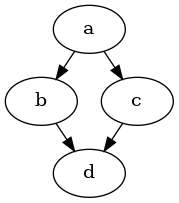

In [5]:
graph

Por padrão, objetos que oferecem tanto visualização png quanto svg são visualizados como SVG no Jupyter. Porém, podemos forçar que sejam visualizados como PNG. <span class="notebook-slide-extra" data-count="1"/>

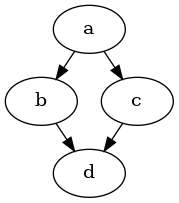

In [6]:
from IPython.display import display_png
display_png(graph)

Ou podemos forçar o uso do `__repr__` do Python.

In [7]:
from IPython.display import display_pretty
display_pretty(graph)

digraph G {
  ranksep=0.25;
  a -> b;
  a -> c;
  b -> d;
  c -> d;
}

Aproximando do assunto da apresentação, podemos usar esse grafo para exibir a AST. <span class="notebook-slide-extra" data-count="1"/>

In [8]:
import ast
from collections import defaultdict

class GraphVisitor(ast.NodeVisitor):
    
    def __init__(self):
        self.parent = []
        self.graph = defaultdict(list)
        self.id = 0
        
    def generic_visit(self, node):
        old_parent = self.parent
        name = type(node).__name__ + str(self.id)
        self.id += 1
        if old_parent:
            self.graph[old_parent].append(name)
        self.parent = name
        super().generic_visit(node)
        self.parent = old_parent


Executando para a própria célula. <span class="notebook-slide-extra" data-count="1"/>

In [9]:
tree = ast.parse(In[-1])
visitor = GraphVisitor()
visitor.visit(tree)

Visualização da AST. <span class="notebook-slide-extra" data-count="1"/>

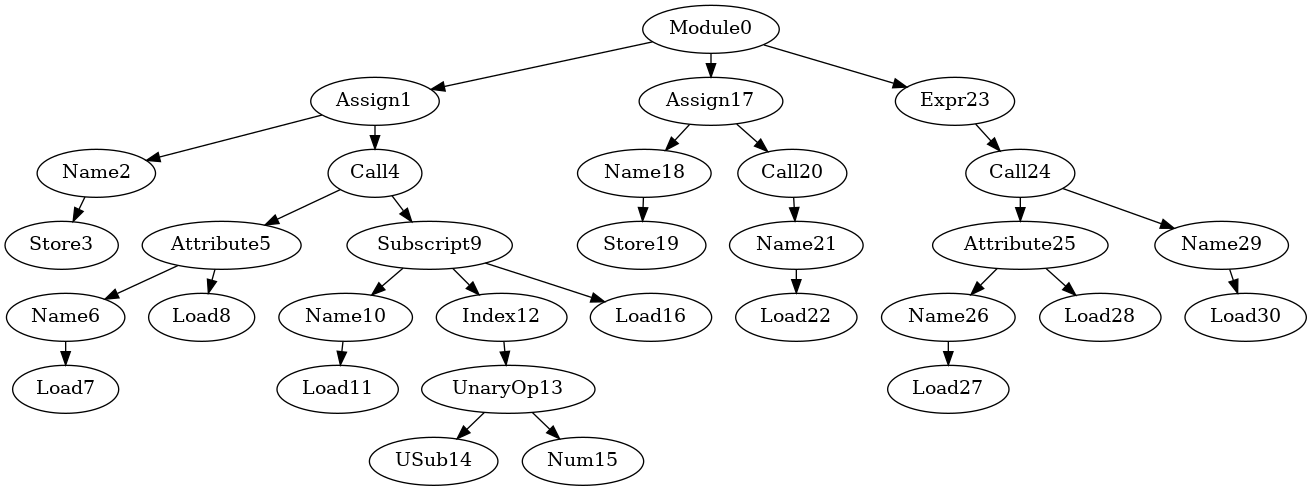

In [10]:
Graph(visitor.graph)

## Exercício 12

Modifique a classe `GraphVisitor` para exibir valores nos nós do tipo `Name` e `Num`.

## Exercício 13

Implemente uma cell magic para visualizar a AST.

## Widgets Interativos

Finalmente, uma outra forma de interagir com o Jupyter é a partir de widgets interativos. Esses widgets podem ser usados para fazer formulários, dashboards e até mesmo variar rapidamente parâmetros de funções.


O widget a seguir interage com a função `fib`, definida no início deste notebook para variar os parâmetros dela. <span class="notebook-slide-extra" data-count="1"/>

In [11]:
from ipywidgets import interact

def fib(x):
    if x <= 1:
        return x
    return fib(x - 1) + fib(x - 2)

interact(fib, x=(1, 30))

interactive(children=(IntSlider(value=15, description='x', max=30, min=1), Output()), _dom_classes=('widget-in…

<function __main__.fib(x)>

Essa função também pode ser usada como um decorador <span class="notebook-slide-extra" data-count="1"/>

In [12]:
@interact
def add(x=1, y=2, template="A soma de {x} com {y} resulta em {z}"):
    z = x + y
    print(template.format(x=x, y=y, z=z))

interactive(children=(IntSlider(value=1, description='x', max=3, min=-1), IntSlider(value=2, description='y', …

Podemos definir o intervalo dos valores <span class="notebook-slide-extra" data-count="1"/>

In [13]:
@interact(x=(0, 100), y=(0, 100))
def add(x=1, y=2, template="A soma de {x} com {y} resulta em {z}"):
    z = x + y
    print(template.format(x=x, y=y, z=z))

interactive(children=(IntSlider(value=1, description='x'), IntSlider(value=2, description='y'), Text(value='A …

O widget também pode ser usado com visualizações ricas <span class="notebook-slide-extra" data-count="1"/>

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

@interact(count=(1, 35))
def generate_plot(count=15):
    x = range(count)
    y = [fib(n) for n in x]
    plt.plot(x, y)

interactive(children=(IntSlider(value=15, description='count', max=35, min=1), Output()), _dom_classes=('widge…

Para números grandes, o uso do `interact` com a nossa implementação de fibonacci começou a não ser tão interativa.

Em funções de longa duração, a atualização automatica do `interact` pode atrapalhar mais do que ajudar. Para resolver isso, podemos usar o `interact_manual` <span class="notebook-slide-extra" data-count="1"/>

In [16]:
from ipywidgets import interact_manual

@interact_manual(count=(1, 35))
def generate_plot(count=15):
    x = range(count)
    y = [fib(n) for n in x]
    plt.plot(x, y)

interactive(children=(IntSlider(value=15, description='count', max=35, min=1), Button(description='Run Interac…

## Exercício 14

Implemente uma função interativa que permita escolher um arquivo de código fonte usando um drop-down e imprima a quantidade de letras do arquivo após a escolha.

Dica: ao passar uma lista ou dicionário para o `interact`, é criado um elemento drop-down.

## Widgets completos

O `interact` é uma simplificação do sistema de widgets para facilitar o uso em funções. Porém, quando estamos criando dashboards ou formulários mais completos, podemos usar o sistema mais completo.

A seguir, criaremos um slider que não depende de nenhuma função `interact` <span class="notebook-slide-extra" data-count="1"/>

In [17]:
from ipywidgets import IntSlider

slider = IntSlider(
    value=7,
    min=0,
    max=10,
    step=1,
    description='Test:'
)
slider

IntSlider(value=7, description='Test:', max=10)

<span class="notebook-slide-extra" data-count="1"/>
<span class="notebook-slide-scroll" data-position="-1"/>

Podemos acessar o valor do slider através do atributo `.value`

In [18]:
slider.value

7

Se quisermos ter o efeito do `interact` de executar alguma função ao alterar o slider, podemos definir funções de observação <span class="notebook-slide-extra" data-count="1"/>

In [19]:
def add1(change):
    if change.name == "value":
        print(change.new + 1)

slider.observe(add1)
slider

IntSlider(value=7, description='Test:', max=10)

<span class="notebook-slide-scroll" data-position="-1"/>

Note que verificamos o tipo da observação ao receber a mudança. Algumas mudanças no widget não ocorrem no valor e isso acaba mudando o resultado de `change.new`. Além de `change.new` e `change.name`, podemos acessar outros atributos de `change`, como `change.old`

Note também que ao fazermos `print` nessa função, os outputs anteriores foram preservados

Se quisermos ter um controle maior do output, podemos usar um widget específico de output <span class="notebook-slide-extra" data-count="1"/>

In [20]:
from ipywidgets import Output

out = Output()
with out:
    print("Dentro do output novo")
print("Fora do output novo")
out

Fora do output novo


Output()

<span class="notebook-slide-scroll" data-position="-1"/>
<span class="notebook-slide-extra" data-count="1"/>

Podemos usar o objeto de output para apagar o conteúdo

In [21]:
out.clear_output()

Agora vamos combinar o slider com o output para gerar o efeito do `interact`

Primeiro, precisamos limpar todos os eventos de observação que registramos no slider. <span class="notebook-slide-extra" data-count="1"/>

In [22]:
slider.unobserve_all()

Em seguida, podemos criar um novo evento que imprima dentro do objeto de output <span class="notebook-slide-extra" data-count="1"/>

def add1(change):
    if change.name == "value":
        out.clear_output()
        with out:
            print(change.new + 1)

slider.observe(add1)

Por fim, criamos um widget que combine os dois no mesmo lugar usando `VBox` <span class="notebook-slide-extra" data-count="1"/>

In [23]:
from ipywidgets import VBox

VBox([slider, out])

## Exercício 15

Use o widget `Button` para simular o `interact_manual`. Esse widget possui um método `on_click` para definir funções de callback

## Exercício 16

Faça um widget que imprima a soma acumulada de todas as suas execuções

O objetivo desse exercício é pensar em como criar widgets com estados que continuem existindo além de uma execução da função observadora ou do interact

## Lista de Widgets

Foram apresentados `IntSlider`, `Output`, `VBox` e `Button` até agora. No restante deste notebook, vou apresentar outros widgets que existem na biblioteca `ipywidgets`

Parte do material tirado de https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html

### Widgets de texto

#### Label

Apenas um label somente leitura <span class="notebook-slide-extra" data-count="1"/>

In [24]:
from ipywidgets import Label
Label("Texto")

Label(value='Texto')

#### Text

Campo de texto <span class="notebook-slide-extra" data-count="1"/>

In [25]:
from ipywidgets import Text
Text(
    value='Hello World',
    placeholder='Type something',
    description='String:',
    disabled=False
)

Text(value='Hello World', description='String:', placeholder='Type something')

#### Textarea

Área de texto <span class="notebook-slide-extra" data-count="1"/>

In [26]:
from ipywidgets import Textarea
Textarea(
    value='Hello World',
    placeholder='Type something',
    description='String:',
    disabled=False
)

Textarea(value='Hello World', description='String:', placeholder='Type something')

#### Combobox

Combobox com autocomplete <span class="notebook-slide-extra" data-count="1"/>


In [27]:
from ipywidgets import Combobox
Combobox(
    # value='John',
    placeholder='Choose Someone',
    options=['Paul', 'John', 'George', 'Ringo'],
    description='Combobox:',
    ensure_option=True,
    disabled=False
)

Combobox(value='', description='Combobox:', ensure_option=True, options=('Paul', 'John', 'George', 'Ringo'), p…

#### HTML

HTML somente leitura <span class="notebook-slide-extra" data-count="1"/>

In [28]:
from ipywidgets import HTML
HTML(
    value="Hello <b>World</b>",
    placeholder='Some HTML',
    description='Some HTML',
)

HTML(value='Hello <b>World</b>', description='Some HTML', placeholder='Some HTML')

#### HTMLMath

HTML somente leitura com fórmulas <span class="notebook-slide-extra" data-count="1"/>

In [29]:
from ipywidgets import HTMLMath
HTMLMath(
    value=r"Some math and <i>HTML</i>: \(x^2\) and $$\frac{x+1}{x-1}$$",
    placeholder='Some HTML',
    description='Some HTML',
)

HTMLMath(value='Some math and <i>HTML</i>: \\(x^2\\) and $$\\frac{x+1}{x-1}$$', description='Some HTML', place…

### Widgets numéricos

#### FloatSlider

Semelhante a `IntSlider`, mas para `float` <span class="notebook-slide-extra" data-count="1"/>

In [30]:
from ipywidgets import FloatSlider
FloatSlider(
    value=7.5,
    min=0,
    max=10.0,
    step=0.1,
    readout_format='.1f'
)

FloatSlider(value=7.5, max=10.0, readout_format='.1f')

#### FloatLogSlider

`FloatSlider` com escala logaritimica <span class="notebook-slide-extra" data-count="1"/>

In [31]:
from ipywidgets import FloatLogSlider
FloatLogSlider(
    value=10,
    base=10,
    min=-10, # max exponent of base
    max=10, # min exponent of base
    step=0.2, # exponent step
    description='Log Slider'
)

FloatLogSlider(value=10.0, description='Log Slider', max=10.0, min=-10.0, step=0.2)

#### IntRangeSlider, FloatRangeSlider

Sliders com dois valores <span class="notebook-slide-extra" data-count="2"/>

In [32]:
from ipywidgets import IntRangeSlider
IntRangeSlider(
    value=[5, 7],
    min=0,
    max=10,
    step=1,
)

IntRangeSlider(value=(5, 7), max=10)

In [33]:
_.value

(5, 7)

#### IntProgress, FloatProgress

Widgets que representam barra de progresso <span class="notebook-slide-extra" data-count="1"/>


In [34]:
from ipywidgets import IntProgress
IntProgress(
    value=7,
    min=0,
    max=10,
    step=1,
    description='Loading:',
    bar_style='', # 'success', 'info', 'warning', 'danger' or ''
    orientation='horizontal'
)

IntProgress(value=7, description='Loading:', max=10)

#### IntText, FloatText

Campos de texto numéricos <span class="notebook-slide-extra" data-count="1"/>


In [35]:
from ipywidgets import IntText
IntText(
    value=7,
    description='Any:',
    disabled=False
)

IntText(value=7, description='Any:')

#### BoundedIntText, BoundedFloatText

Campos de texto numéricos limitados <span class="notebook-slide-extra" data-count="1"/>


In [36]:
from ipywidgets import BoundedFloatText
BoundedFloatText(
    value=7.5,
    min=0,
    max=10.0,
    step=0.1,
    description='Text:',
)

BoundedFloatText(value=7.5, description='Text:', max=10.0, step=0.1)

### Widgets booleanos

#### ToggleButton

Botão com estado booleano <span class="notebook-slide-extra" data-count="1"/>


In [37]:
from ipywidgets import ToggleButton
ToggleButton(
    value=False,
    description='Click me',
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
    icon='check'
)

ToggleButton(value=False, description='Click me', icon='check', tooltip='Description')

#### Checkbox

<span class="notebook-slide-extra" data-count="1"/>


In [38]:
from ipywidgets import Checkbox
Checkbox(
    value=False,
    description='Check me',
)

Checkbox(value=False, description='Check me')

#### Valid

Indicador somente leitura  <span class="notebook-slide-extra" data-count="1"/>


In [39]:
from ipywidgets import Valid
Valid(
    value=False,
    description='Valid!',
)

Valid(value=False, description='Valid!')

### Widgets de seleção

#### Dropdown

Widget para selecionar elementos de uma lista <span class="notebook-slide-extra" data-count="1"/>

In [40]:
from ipywidgets import Dropdown
Dropdown(
    options=['1', '2', '3'], # [('One', 1), ('Two', 2), ('Three', 3)]
    value='2',
    description='Number:',
    disabled=False,
)

Dropdown(description='Number:', index=1, options=('1', '2', '3'), value='2')

#### RadioButtons

Selecionar usando radio buttons <span class="notebook-slide-extra" data-count="1"/>

In [41]:
from ipywidgets import RadioButtons
RadioButtons(
    options=['One', 'Two', 'Three'],
    description='Number:',
    disabled=False
)

RadioButtons(description='Number:', options=('One', 'Two', 'Three'), value='One')

#### Select

Selecionar usando uma lista visível <span class="notebook-slide-extra" data-count="1"/>

In [42]:
from ipywidgets import Select
Select(
    options=['Linux', 'Windows', 'OSX'],
    value='OSX',
    # rows=10,
    description='OS:',
    disabled=False
)

Select(description='OS:', index=2, options=('Linux', 'Windows', 'OSX'), value='OSX')

#### SelectionSlider

Slider para seleção de campos nominais <span class="notebook-slide-extra" data-count="1"/>

In [43]:
from ipywidgets import SelectionSlider
SelectionSlider(
    options=['mal passada', 'ao ponto', 'bem passada'],
    value='ao ponto',
    description='Carne ...',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True
)

SelectionSlider(continuous_update=False, description='Carne ...', index=1, options=('mal passada', 'ao ponto',…

#### SelectionRangeSlider

Slider para seleção de intervalo nominal <span class="notebook-slide-extra" data-count="1"/>

In [44]:
import datetime
from ipywidgets import SelectionRangeSlider
dates = [datetime.date(2019,i,1) for i in range(1,13)]
options = [(i.strftime('%b'), i) for i in dates]
SelectionRangeSlider(
    options=options,
    index=(0,11),
    description='2019',
    disabled=False
)

SelectionRangeSlider(description='2019', index=(0, 11), options=(('Jan', datetime.date(2019, 1, 1)), ('Feb', d…

#### ToggleButtons

`ToggleButton` para escolher um único elemento de lista <span class="notebook-slide-extra" data-count="1"/>

In [45]:
from ipywidgets import ToggleButtons
ToggleButtons(
    options=['Slow', 'Regular', 'Fast'],
    description='Speed:',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=['Description of slow', 'Description of regular', 'Description of fast'],
#     icons=['check'] * 3
)

ToggleButtons(description='Speed:', options=('Slow', 'Regular', 'Fast'), tooltips=('Description of slow', 'Des…

#### SelectMultiple

Seleção de vários elementos <span class="notebook-slide-extra" data-count="1"/>

In [46]:
from ipywidgets import SelectMultiple
SelectMultiple(
    options=['Apples', 'Oranges', 'Pears'],
    value=['Oranges'],
    #rows=10,
    description='Fruits',
    disabled=False
)

SelectMultiple(description='Fruits', index=(1,), options=('Apples', 'Oranges', 'Pears'), value=('Oranges',))

### Widgets de estrutura

#### HBox

Semelhante ao `VBox`, mas exibe widgets na horizontal ao invés de na vertical <span class="notebook-slide-extra" data-count="1"/>

In [47]:
from ipywidgets import HBox
HBox([slider, slider])

#### GridBox

Semelhante a `VBox` e `HBox`, mas usa `HTML Grid` para fazer a exibição <span class="notebook-slide-extra" data-count="1"/>

Aqui estamos usando Layout também para definir atributos do `CSS`

In [48]:
from ipywidgets import GridBox, Layout
items = [Label(str(i)) for i in range(8)]
GridBox(items, layout=Layout(grid_template_columns="repeat(3, 100px)"))

GridBox(children=(Label(value='0'), Label(value='1'), Label(value='2'), Label(value='3'), Label(value='4'), La…

#### Accordion

Exibe widgets em páginas diferentes de Accordion <span class="notebook-slide-extra" data-count="1"/>

In [49]:
from ipywidgets import Accordion
accordion = Accordion([slider, slider])
accordion.set_title(0, 'Page 0')
accordion.set_title(1, 'Page 1')
accordion

Accordion(children=(IntSlider(value=7, description='Test:', max=10), IntSlider(value=7, description='Test:', m…

#### Tab

Exibe widgets em abas diferentes <span class="notebook-slide-extra" data-count="1"/>

In [50]:
from ipywidgets import Tab
tab = Tab([slider, slider])
tab.set_title(0, 'Page 0')
tab.set_title(1, 'Page 1')
tab

### Outros widgets

#### Play

Widget útil para controlar animações <span class="notebook-slide-extra" data-count="1"/>

In [51]:
from ipywidgets import Play, jslink
play = Play(
#     interval=10,
    value=50,
    min=0,
    max=100,
    step=1,
    description="Press play",
    disabled=False
)
slider = IntSlider()
jslink((play, 'value'), (slider, 'value'))
HBox([play, slider])

#### DatePicker

Widget para escolher datas <span class="notebook-slide-extra" data-count="1"/>

In [52]:
from ipywidgets import DatePicker
DatePicker(
    description='Pick a Date',
    disabled=False
)

DatePicker(value=None, description='Pick a Date')

#### ColorPicker

Widget para escolher cor <span class="notebook-slide-extra" data-count="1"/>

In [53]:
from ipywidgets import ColorPicker
ColorPicker(
    concise=False,
    description='Pick a color',
    value='blue',
    disabled=False
)

ColorPicker(value='blue', description='Pick a color')

#### FileUpload

Widget para fazer upload de arquivos e receber em bytes <span class="notebook-slide-extra" data-count="1"/>

In [54]:
from ipywidgets import FileUpload
FileUpload(
    accept='',  # Accepted file extension e.g. '.txt', '.pdf', 'image/*', 'image/*,.pdf'
    multiple=False  # True to accept multiple files upload else False
)

FileUpload(value={}, description='Upload')

#### Image

Widget para visualizar imagem <span class="notebook-slide-extra" data-count="1"/>

In [55]:
from ipywidgets import Image
file = open("images/jupyter.png", "rb")
image = file.read()
Image(
    value=image,
    format='png',
    width=50,
    height=50,
)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00X\x00\x00\x00f\x08\x06\x00\x00\x00O\xe5V\xe9\x00\…

#### Controller

Widget para usar controle de jogo como entrada <span class="notebook-slide-extra" data-count="1"/>

In [56]:
from ipywidgets import Controller
Controller(
    index=0,
)

Controller()

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;


&nbsp;

&nbsp;

&nbsp;

